### Simulate data for null t-test

Run a simulation for a t-test that is randomly sampled from one distribution with no effect between groups, and identify experiments with a significant effect.

In [ ]:
# Import packages
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [24]:
# Set seaborn context
sns.set_style("white")
sns.set_context("talk", 
                font_scale=1)

In [2]:
# Parameters for the simulation
nsamples = 8 # number of samples per group
mu = 900
sigma = 150
niter = 1000
np.random.seed(42) # set the randomization seed for repeatability

experiments = {
    'vals': list(),
    'tstat': list(),
    'pval': list()
}

In [3]:
for n in range(niter):
    # Simulate data from a gaussian distribution
    vals = np.random.normal(loc=mu, scale=sigma, size=(nsamples,2))

    # Calculate the t-statistic and p-value
    res = sp.stats.ttest_ind(vals[:,0], vals[:,1])
    tstat = res.statistic
    pval = res.pvalue

    experiments['vals'].append(vals)
    experiments['tstat'].append(tstat)
    experiments['pval'].append(pval)

In [4]:
# Put the experiment results in a DataFrame
all_res = pd.DataFrame({
    'tstat': experiments['tstat'],
    'pval': experiments['pval']
})

all_res.describe()

,tstat,pval
count,1000.000000,1000.000000
mean,0.004977,0.524930
std,1.021524,0.289376
min,-3.474174,0.002068
25%,-0.608012,0.275309
50%,0.024529,0.540481
75%,0.641515,0.777461
max,3.770375,0.999842


In [5]:
all_res[all_res['pval']<0.05]

,tstat,pval
44,-3.474174,0.003721
50,3.611712,0.002832
68,2.591209,0.021339
75,-2.168780,0.047813
139,-2.403719,0.030650
177,2.593773,0.021233
181,-2.823153,0.013548
182,-3.102130,0.007799
193,-2.305594,0.036956
196,3.050385,0.008643


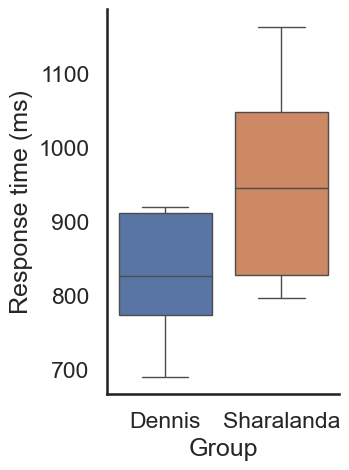

In [28]:
# Get the data for an example experiment
exp_to_use = 75

exp_sample = pd.DataFrame({
    'Response time (ms)': experiments['vals'][exp_to_use].ravel(order='F'),
    'Group': np.repeat(['Dennis', 1], nsamples)
})

fig, ax = plt.subplots(figsize=(3,5))
sns.boxplot(ax=ax,data=exp_sample,x='Group',y='Response time (ms)',hue='Group',legend=False)
sns.despine()
plt.xticks([0, 1], ['Dennis','Sharalanda'])
plt.show()

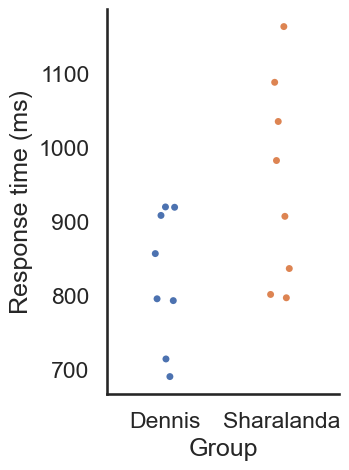

In [26]:
fig, ax = plt.subplots(figsize=(3,5))
sns.stripplot(ax=ax,data=exp_sample,x='Group',y='Response time (ms)',hue='Group',legend=False)
sns.despine()
plt.xticks([0, 1], ['Dennis','Sharalanda'])
plt.show()

In [30]:
print(f"Cohen's d = {experiments['tstat'][exp_to_use]/np.sqrt(nsamples/2)}")
print(f"P-value = {experiments['pval'][exp_to_use]}")

Cohen's d = -1.0843897782335838
P-value = 0.04781289097679557


### Calculate statistical power of the test